In [1]:
import networkx as nx
import numpy as np
from sympy import symbols, solve_poly_system
import matplotlib.pyplot as plt


def q_bar_prime_i(i, j):
    return -F/(R*steady[i]*steady[i]*steady[j])
    
def q_bar_prime_j(i, j):
    return -(F-B*steady[i])/(R*steady[j]*steady[j]*steady[i])


def r_i_j(i,j):
    if adjacency[i,j] == 0:
        return 0
    
    sum = 0
    for k in range(0,n):
        if adjacency[i,k] == 1:
            sum = sum + q_bar_prime_i(i,k)
    
    return steady[j]*q_bar_prime_j(i,j)/(steady[i]*sum)

def _g(i, j):
    if i == j:
        return syms[i][j] - 1
    
    eq = syms[i][j]
    for q in range(0,n):
        eq = eq - r[i,q]*syms[q][j]
    return eq

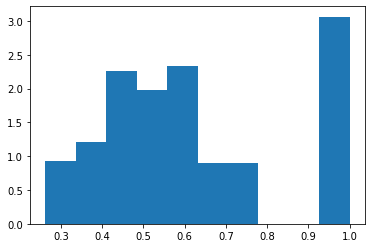

In [4]:
n = 5
prob = .6
F = .5
B = .2
R = 3
iteration = 20

result = []
for x in range(0,iteration):
    try:
        graph = nx.erdos_renyi_graph(n, prob)
        adjacency = nx.to_numpy_matrix(graph).A
        steady = [F/(R/graph.degree(i) + B) for i in range(0,n)]
        r = np.array([[r_i_j(i,j) for j in range(0,n)] for i in range(0,n)])
        syms = [[symbols('{}_{}'.format(i,j)) for i in range(0,n)] for j in range(n)]
        eq_system = [_g(int(cnt/n),cnt%n) for cnt in range(0,n*n)]                    
        g = solve_poly_system(eq_system)
        result.extend(list(g[0]))
    except Exception as e:
        continue

count, bins, patches = plt.hist([float(f) for f in result], density=True)
plt.show()